# Differences over $\alpha$

How do our allocations change over different $\alpha$?


In [1]:
import sys

# add library to path (or else, src not visible)
sys.path.insert(0, "../../")

import matplotlib.pyplot as plt
import numpy as np

from src.AllocationSolver import AllocationSolver, social_welfare_absolute, social_welfare_relative, State
from src.dists import SymmetricDiscreteDistribution, Distribution, UniformDistribution
from src.plots import plot_Z_versus_x, plot_x_versus_d, plot_against_alpha

In [2]:
# alpha_0 = social_welfare_absolute(0)
# alpha_1 = social_welfare_absolute(1)
# alpha_inf = social_welfare_absolute(np.inf)

# alpha_0_rel = social_welfare_relative(0)
# alpha_1_rel = social_welfare_relative(1)
# alpha_inf_rel = social_welfare_relative(np.inf)

We now try varying $d_i$.

In [3]:
# d_1 = np.arange(0.01, 1, 0.01)
# d_2 = 0.7
# d_3 = 0.6
# x_1 = 0.4
# x_2 = 0.5
# x_3 = 0.4

# a_0 = np.zeros_like(d_1)
# a_1 = np.zeros_like(d_1)
# a_inf = np.zeros_like(d_1)

# for i, d_1_val in enumerate(d_1):
#     allocs = [min(d_1_val, x_1), min(d_2, x_2), min(d_3, x_3)]
#     demands = [d_1_val, d_2, d_3]
#     a_0[i] = alpha_0(allocs, demands)
#     a_1[i] = alpha_1(allocs, demands)
#     a_inf[i] = alpha_inf(allocs, demands)

# plt.plot(d_1, a_0, label="alpha_0")
# plt.plot(d_1, a_1, label="alpha_1")
# plt.plot(d_1, a_inf, label="alpha_inf")
# plt.legend()

We now try varying $x_1$.

In [4]:
# d_1 = 0.5
# d_2 = 0.7
# d_3 = 0.9
# x_1 = np.arange(0.01, 1, 0.01)
# x_2 = 0.35
# x_3 = 0.45

# a_0 = np.zeros_like(x_1)
# a_1 = np.zeros_like(x_1)
# a_inf = np.zeros_like(x_1)

# a_0_rel = np.zeros_like(x_1)
# a_1_rel = np.zeros_like(x_1)
# a_inf_rel = np.zeros_like(x_1)

# for i, x_1_val in enumerate(x_1):
#     allocs = [x_1_val, x_2, x_3]
#     demands = [d_1, d_2, d_3]
#     a_0[i] = alpha_0(allocs, demands)
#     a_1[i] = alpha_1(allocs, demands)
#     a_inf[i] = alpha_inf(allocs, demands)
#     a_0_rel[i] = alpha_0_rel(allocs, demands)
#     a_1_rel[i] = alpha_1_rel(allocs, demands)
#     a_inf_rel[i] = alpha_inf_rel(allocs, demands)

# plt.plot(x_1, a_0, label="alpha_0")
# plt.plot(x_1, a_1, label="alpha_1")
# plt.plot(x_1, a_inf, label="alpha_inf")
# plt.plot(x_1, a_0_rel, label="alpha_0_rel")
# plt.plot(x_1, a_1_rel, label="alpha_1_rel")
# plt.plot(x_1, a_inf_rel, label="alpha_inf_rel")
# plt.legend()

In [50]:
prob = AllocationSolver([Distribution((2, 3), (0.5, 0.5)),
                         Distribution((1, 4), (0.5, 0.5))],
                         1,
                         equity="relative",
                         alloc_step=0.0005,
                         alpha=np.inf,
                         verbosity=2)
prob.solve()


At time 2 with d_t=1 and c_t=0.3335, allocate what's left with Z=0.3332 and waste=0.
At time 2 with d_t=4 and c_t=0.3335, allocate what's left with Z=0.0834 and waste=0.
At time 1 with d_t=2 and c_t=1, we allocate x_t=0.6665.
At time 2 with d_t=1 and c_t=0.25, allocate what's left with Z=0.25 and waste=0.
At time 2 with d_t=4 and c_t=0.25, allocate what's left with Z=0.0625 and waste=0.
At time 1 with d_t=3 and c_t=1, we allocate x_t=0.75.


array([0.18228125, 0.        ])

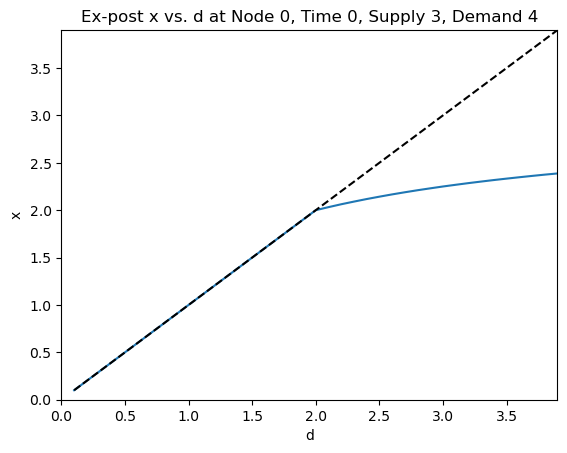

In [51]:
plot_x_versus_d(prob, 0, State(3, 4), 0.1)

In [7]:
prob.change_alpha(np.inf)
prob.solve()

At time 2 with d_t=1 and c_t=0.33499999999999996, allocate what's left with Z=0.3325 and waste=0.
At time 2 with d_t=4 and c_t=0.33499999999999996, allocate what's left with Z=0.0837 and waste=0.
At time 1 with d_t=2 and c_t=1, we allocate x_t=0.665.
At time 2 with d_t=1 and c_t=0.25, allocate what's left with Z=0.25 and waste=0.
At time 2 with d_t=4 and c_t=0.25, allocate what's left with Z=0.0625 and waste=0.
At time 1 with d_t=3 and c_t=1, we allocate x_t=0.75.


array([0.1821875, 0.       ])

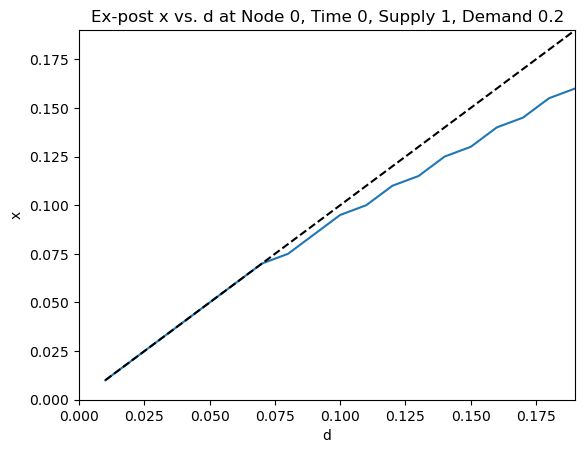

In [8]:
plot_x_versus_d(prob, 0, State(1, 0.2), 0.01)

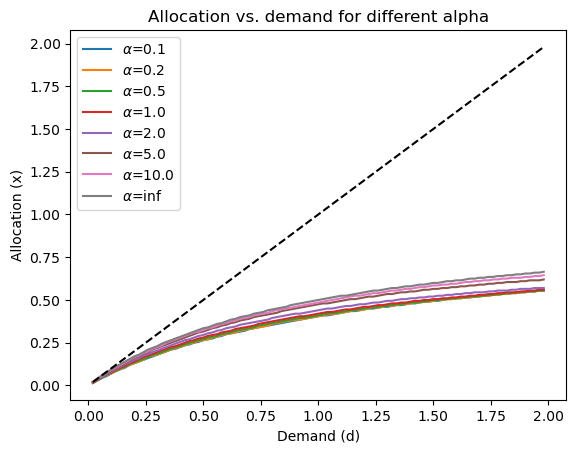

In [9]:
t = 0
c = 1
d = 2
step = 0.02


def x_versus_d_for_alpha(alpha):
    prob.change_alpha(alpha)
    return prob.provide_x_vs_d_plot_data(t, State(c, d), step)

plot_against_alpha(
    x_versus_d_for_alpha,
    x_lab="Demand (d)",
    y_lab="Allocation (x)",
    title="Allocation vs. demand for different alpha",
    identity=True
)